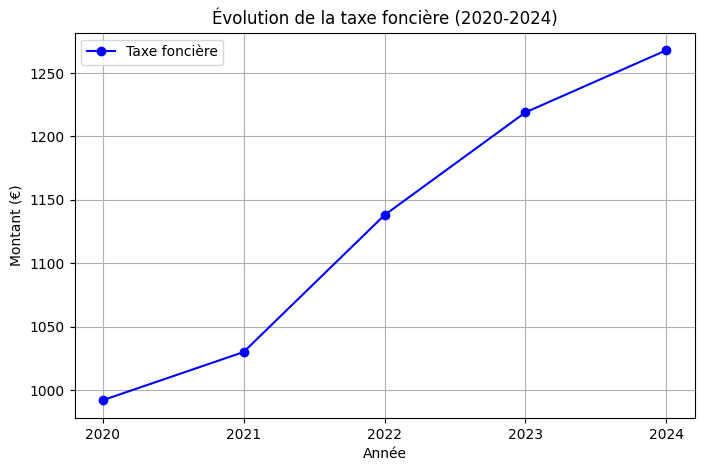

(array([ 3.83064516, 10.48543689,  7.11775044,  4.01968827]),
 6.329040615657844)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data
years = np.array([2020, 2021, 2022, 2023, 2024])
tax_values = np.array([992, 1030, 1138, 1219, 1268])

# Calculate annual growth rates
annual_growth_rates = (tax_values[1:] / tax_values[:-1] - 1) * 100

# Calculate the equivalent annual growth rate over the period
total_growth_rate = (tax_values[-1] / tax_values[0]) ** (1 / (len(years) - 1)) - 1
total_growth_rate_percentage = total_growth_rate * 100

# Plotting the tax evolution
plt.figure(figsize=(8, 5))
plt.plot(years, tax_values, marker='o', color='b', linestyle='-', label='Taxe foncière')
plt.xlabel('Année')
plt.ylabel('Montant (€)')
plt.title("Évolution de la taxe foncière (2020-2024)")
plt.grid(True)
plt.xticks(years)
plt.legend()

# Show plot
plt.show()

# Display annual growth rates and equivalent annual growth rate
annual_growth_rates, total_growth_rate_percentage

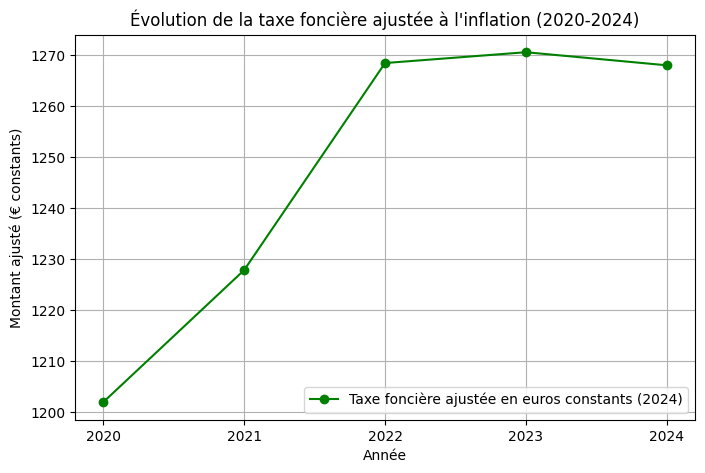

(array([1201.99369808, 1227.87224049, 1268.44268775, 1270.56344969,
        1268.        ]),
 array([ 2.15296823,  3.30412611,  0.16719415, -0.20175692]))

In [7]:
# Data for CPI adjustment
cpi_values = np.array([104.73, 106.45, 113.85, 121.75, 126.90])

# Adjust the tax values for inflation (real values in 2024 constant euros)
adjusted_tax_values = tax_values * (cpi_values[-1] / cpi_values)

# Calculate annual growth rates for the adjusted values
adjusted_annual_growth_rates = (adjusted_tax_values[1:] / adjusted_tax_values[:-1] - 1) * 100

# Plotting the adjusted tax evolution
plt.figure(figsize=(8, 5))
plt.plot(years, adjusted_tax_values, marker='o', color='g', linestyle='-', label='Taxe foncière ajustée en euros constants (2024)')
plt.xlabel('Année')
plt.ylabel('Montant ajusté (€ constants)')
plt.title("Évolution de la taxe foncière ajustée à l'inflation (2020-2024)")
plt.grid(True)
plt.xticks(years)
plt.legend()

# Show plot
plt.show()

# Display adjusted annual growth rates
adjusted_tax_values, adjusted_annual_growth_rates


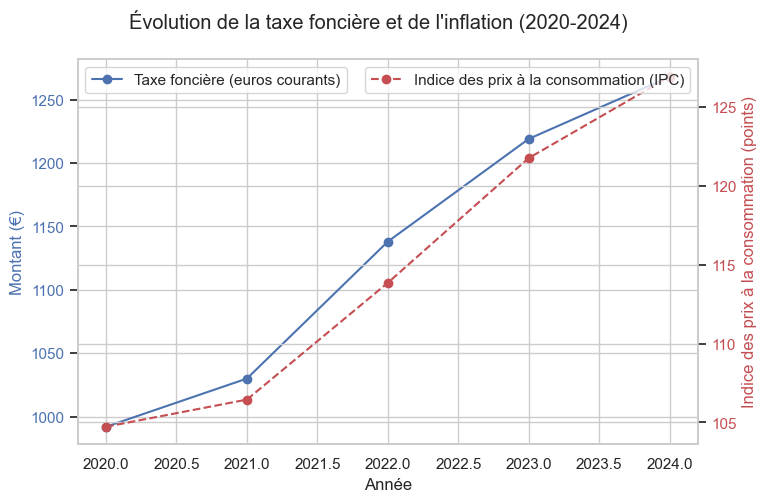

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Données
years = np.array([2020, 2021, 2022, 2023, 2024])
tax_values = np.array([992, 1030, 1138, 1219, 1268])
cpi_values = np.array([104.73, 106.45, 113.85, 121.75, 126.90])

# Ajustement de la taxe en euros constants (2024)
adjusted_tax_values = tax_values * (cpi_values[-1] / cpi_values)

# Création du graphique
fig, ax1 = plt.subplots(figsize=(8, 5))

# Premier axe : taxe foncière
ax1.set_xlabel('Année')
ax1.set_ylabel('Montant (€)', color='b')
ax1.plot(years, tax_values, marker='o', color='b', linestyle='-', label='Taxe foncière (euros courants)')
#ax1.plot(years, adjusted_tax_values, marker='o', color='g', linestyle='-', label='Taxe ajustée (euros constants)')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Deuxième axe : IPC
ax2 = ax1.twinx()
ax2.set_ylabel('Indice des prix à la consommation (points)', color='r')
ax2.plot(years, cpi_values, marker='o', color='r', linestyle='--', label='Indice des prix à la consommation (IPC)')
ax2.tick_params(axis='y', labelcolor='r')

# Titre et légendes
fig.suptitle("Évolution de la taxe foncière et de l'inflation (2020-2024)")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Affichage du graphique
plt.show()


In [10]:
import pandas as pd

# Données fournies
data = {
    'Année': [2020, 2021, 2022, 2023, 2024],
    'Base COMMUNE': [1961, 1966, 2033, 2178, 2262],
    'Cotisation COMMUNE': [441, 736, 761, 815, 847],
    'Base INTERCOMMU': [1961, 1966, 2033, 2178, 2262],
    'Cotisation INTERCOMMU': [23, 23, 94, 100, 104]
}

# Conversion des données en DataFrame
df = pd.DataFrame(data)

# Calcul des taux d'imposition pour chaque année et chaque entité
df['Taux COMMUNE'] = df['Cotisation COMMUNE'] / df['Base COMMUNE']
df['Taux INTERCOMMU'] = df['Cotisation INTERCOMMU'] / df['Base INTERCOMMU']

# Calcul des variations annuelles des bases, cotisations et taux d'imposition
df['Var Base COMMUNE (%)'] = df['Base COMMUNE'].pct_change() * 100
df['Var Cotis COMMUNE (%)'] = df['Cotisation COMMUNE'].pct_change() * 100
df['Var Taux COMMUNE (%)'] = df['Taux COMMUNE'].pct_change() * 100

df['Var Base INTERCOMMU (%)'] = df['Base INTERCOMMU'].pct_change() * 100
df['Var Cotis INTERCOMMU (%)'] = df['Cotisation INTERCOMMU'].pct_change() * 100
df['Var Taux INTERCOMMU (%)'] = df['Taux INTERCOMMU'].pct_change() * 100

# Affichage du tableau final avec les taux et variations
df[['Année', 'Base COMMUNE', 'Cotisation COMMUNE', 'Taux COMMUNE', 
    'Var Base COMMUNE (%)', 'Var Cotis COMMUNE (%)', 'Var Taux COMMUNE (%)',
    'Base INTERCOMMU', 'Cotisation INTERCOMMU', 'Taux INTERCOMMU',
    'Var Base INTERCOMMU (%)', 'Var Cotis INTERCOMMU (%)', 'Var Taux INTERCOMMU (%)']]


,Année,Base COMMUNE,Cotisation COMMUNE,Taux COMMUNE,Var Base COMMUNE (%),Var Cotis COMMUNE (%),Var Taux COMMUNE (%),Base INTERCOMMU,Cotisation INTERCOMMU,Taux INTERCOMMU,Var Base INTERCOMMU (%),Var Cotis INTERCOMMU (%),Var Taux INTERCOMMU (%)
0,2020,1961,441,0.224885,NaN,NaN,NaN,1961,23,0.011729,NaN,NaN,NaN
1,2021,1966,736,0.374364,0.254972,66.893424,66.468975,1966,23,0.011699,0.254972,0.000000,-0.254323
2,2022,2033,761,0.374324,3.407935,3.396739,-0.010827,2033,94,0.046237,3.407935,308.695652,295.226587
3,2023,2178,815,0.374197,7.132317,7.095926,-0.033968,2178,100,0.045914,7.132317,6.382979,-0.699451
4,2024,2262,847,0.374447,3.856749,3.926380,0.067045,2262,104,0.045977,3.856749,4.000000,0.137931


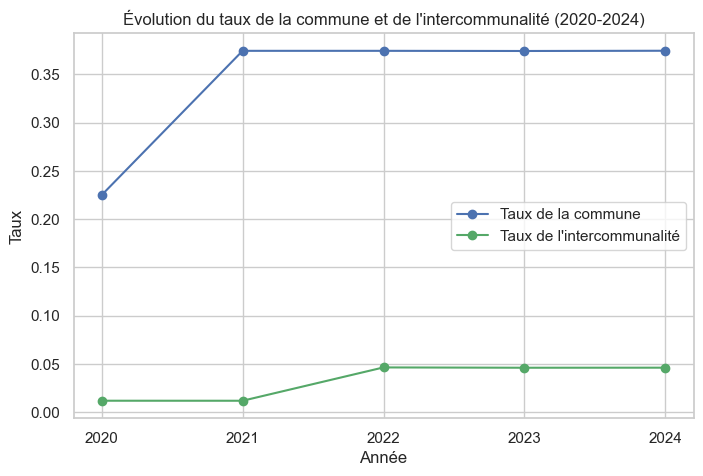

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Données
years = np.array([2020, 2021, 2022, 2023, 2024])
tx_comu = np.array([0.224885, 0.374364, 0.374364, 0.374197, 0.374447])
tx_intercomu = np.array([0.011729, 0.011699, 0.046237, 0.045914, 0.045977])

# Plotting 
plt.figure(figsize=(8, 5))
plt.plot(years, tx_comu, marker='o', color='b', linestyle='-', label='Taux de la commune')
plt.plot(years, tx_intercomu, marker='o', color='g', linestyle='-', label='Taux de l\'intercommunalité')
plt.xlabel('Année')
plt.ylabel('Taux')
plt.title("Évolution du taux de la commune et de l'intercommunalité (2020-2024)")
plt.grid(True)
plt.xticks(years)
plt.legend()

# Show plot
plt.show()